# Supervised vs. Unsupervised Learning

In machine learning there are two major classes of algorithms: supervised and unsupervised learning. Supervised learning algorithms are trained using labeled data. Unsupervised learning algorithms are trained using **unlabeled** data. The goal of supervised learning is to predict a label for unseen data or use regression to estimate the value of a continuous variable. The goal of unsupervised learning is to identify the clustering pattern of unlabeled data or discover subgroups/phenotypes hidden in the data.




In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import display, Markdown

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Supervised Learning with a Decision Tree

We will use a simple Decision Tree classifier to predict the species of iris flowers after spliting the data into an 80% training and 20% testing set.

### Decision Tree
A Decision Tree is a flowchart-like structure where an internal node represents a feature in the data, the branch represents a decision rule, and each leaf node represents the outcome prediction. It is a simple and intrepretable algorithm for both classification and regression tasks. Decision trees were used in medicine as early as [1960 for blood diseases](https://jamanetwork.com/journals/jamainternalmedicine/article-abstract/566103).

In [ ]:
# Split the dataset into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=2024)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: \n{accuracy*100:.2f}% \n")

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n ")
print(cm)

# Generate a classification report
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=iris.target_names)
display(Markdown(f"```\n{report}\n```"))

Accuracy: 
86.67% 

Confusion Matrix: 
 
[[12  0  0]
 [ 0  7  1]
 [ 0  3  7]]

Classification Report:


```
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.70      0.88      0.78         8
   virginica       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30

```

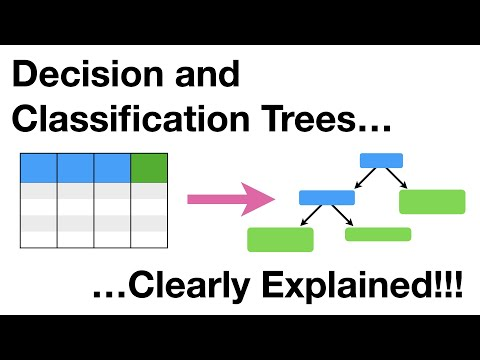

In [ ]:
from IPython.display import YouTubeVideo

video_id = '_L39rN6gz7Y'
YouTubeVideo(video_id, width=800, height=450)

## Unsupervised Learning with K-means Clustering

K-means clustering to group the iris flowers into N clusters. The number of clusters can be inferred using the elbow method where the squared sum error (sse) has plateaued. In this example we are selecting three clusters. We will then compare the clusters with the actual species labels to see how well the algorithm performed.

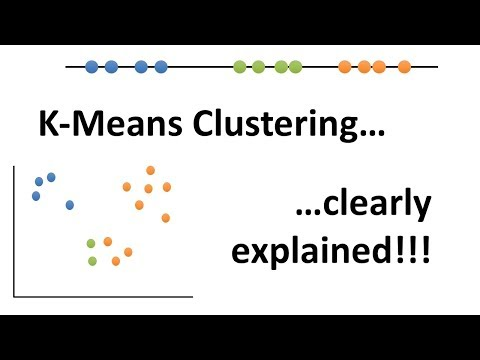

In [ ]:
from IPython.display import YouTubeVideo

video_id = '4b5d3muPQmA'
YouTubeVideo(video_id, width=800, height=450)

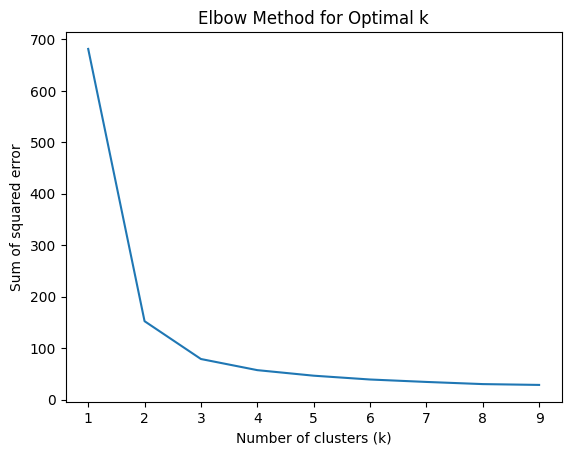

In [ ]:
# Define a range for possible number of clusters
k_rng = range(1,10)

sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X)
    sse.append(km.inertia_)

# Plot the elbow method graph
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method for Optimal k')
plt.show()

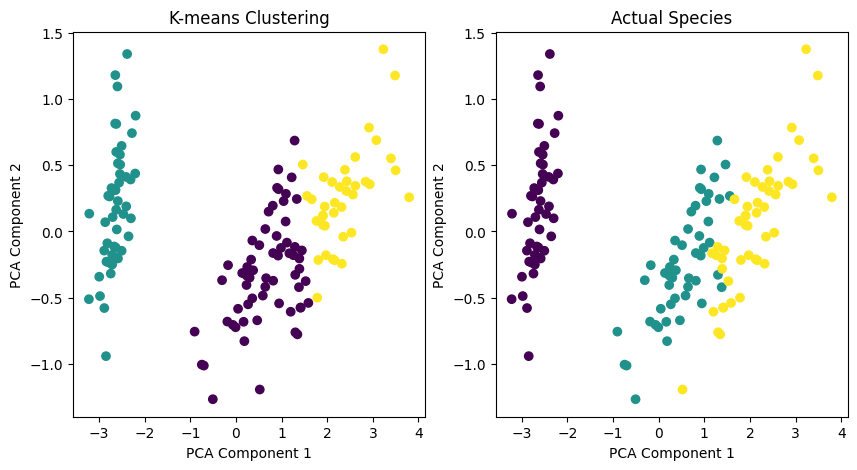

In [ ]:
# Initialize and train the K-means model
kmeans = KMeans(n_clusters=3, random_state=2024, n_init=10) ## Experiment with changing the n_clusters!!
kmeans.fit(X)
clusters = kmeans.labels_

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot the actual species
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Actual Species')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

In [ ]:
## End of Script